## Exercise 


For this exercise, you will be working with the [House Price Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code).

Please grab the train.csv file from Kaggle and explore this dataset. You need to perform explroatory data analysis and see if there is any correlation between the variables and analyze the distribution of the dataset. The question is open-ended and basically you're asked to perform EDA. 


1- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 3 of your assignment, you need to submit at least one jupyter notebook file and one pdf file.


2- Push your code and project to github and provide the link to your code here. Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510





In [1]:
#1. Performing Exploratory Data Analysis:
# Importing the necessary libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Loading the data set provided using the pandas
df_train = pd.read_csv("C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/assgnment/Assignment 3/train (1).csv")

In [4]:
# Let us explore/understand the data using the first few rows of the data
# Let's view the first few rows of the data:
print(df_train.head())

#This dataset contains a variety of features that describe the physical attributes, condition, and sale details of properties.

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [5]:
# Let's get the data set information
print(df_train.info())
# the below output gives the data set size, i.e., the number of observations and variables, the data type of variables and the memory used to store this data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Summary statistics
print(df_train.describe())

#provides the summary of the variables

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [7]:
# Converting columns to categorical data type after observing the values for easier analysis
categorical_columns = [
    'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
    'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
    'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
    'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
    'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'GarageCars',
    'MiscFeature', 'SaleType', 'SaleCondition','OverallQual', 'OverallCond','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
    'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces'
]
df_train[categorical_columns] = df_train[categorical_columns].astype('category')


In [8]:
# We can also do the same for numeric variables which are useful, for the better understanding and usage of data to fill out missing or blank values further
# Converting columns to numeric data type
numerical_columns = [
    'LotFrontage', 'LotArea',   'YearBuilt',
    'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
   'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'
]
df_train[numerical_columns] = df_train[numerical_columns].apply(pd.to_numeric, errors='coerce')


In [9]:
# Finding the median for numeric columns which is not mentioned in describe function, which we use to fill missing values
# Select numeric columns
medians = df_train[numerical_columns].median(skipna=True)
print(medians)

LotFrontage          69.0
LotArea            9478.5
YearBuilt          1973.0
YearRemodAdd       1994.0
MasVnrArea            0.0
BsmtFinSF1          383.5
BsmtFinSF2            0.0
BsmtUnfSF           477.5
TotalBsmtSF         991.5
1stFlrSF           1087.0
2ndFlrSF              0.0
LowQualFinSF          0.0
GrLivArea          1464.0
GarageYrBlt        1980.0
GarageArea          480.0
WoodDeckSF            0.0
OpenPorchSF          25.0
EnclosedPorch         0.0
3SsnPorch             0.0
ScreenPorch           0.0
PoolArea              0.0
MiscVal               0.0
MoSold                6.0
YrSold             2008.0
SalePrice        163000.0
dtype: float64


In [10]:
# Missing values
# Checking for missing values in categorical variables:
missing_categorical = df_train[categorical_columns].isna().sum()
missing_categorical
# Therefore, we have missing values in categorical variables in Alley, MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu       
# GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature                                                                  
# we need to fill these missing values with mode values of their columns for data cleaning.

MSSubClass          0
MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
GarageCars          0
MiscFeature      1406
SaleType            0
SaleCondition       0
OverallQua

In [11]:
#Checking missing values in numerical variables:
missing_numerical = df_train[numerical_columns].isna().sum()
missing_numerical

# Therefore, we have missing values in numerical variables in LotFrontage, MasVnrArea, GarageYrBlt
# we need to fill these missing values with median values of their columns for data cleaning.

LotFrontage      259
LotArea            0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
GarageYrBlt       81
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [12]:
# Impute categorical missing values with the mode
for column in categorical_columns:
    df_train[column] = df_train[column].fillna(df_train[column].mode()[0])

# Verify the imputation
print(df_train[categorical_columns].isna().sum())

MSSubClass       0
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
GarageCars       0
MiscFeature      0
SaleType         0
SaleCondition    0
OverallQual      0
OverallCond      0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [13]:
# Impute numerical missing values with the median
for column in numerical_columns:
    df_train[column] = df_train[column].fillna(df_train[column].median())

# Verify the imputation
print(df_train[numerical_columns].isna().sum())

LotFrontage      0
LotArea          0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
GarageYrBlt      0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64


In [30]:
#Therefore, there no missing values left in the data set.
# Saving the imputed DataFrame to a new Excel file in a specified directory
df_train.to_excel('C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/assgnment/Assignment 3/imputed_train_dataset.xlsx', index=False)


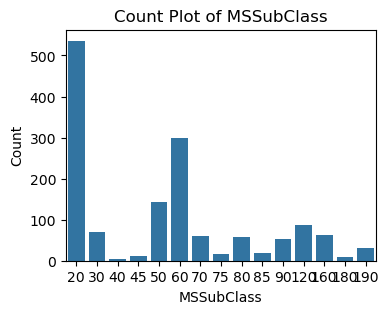

Plot for MSSubClass saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_MSSubClass.png


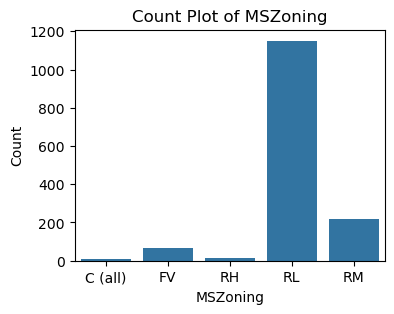

Plot for MSZoning saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_MSZoning.png


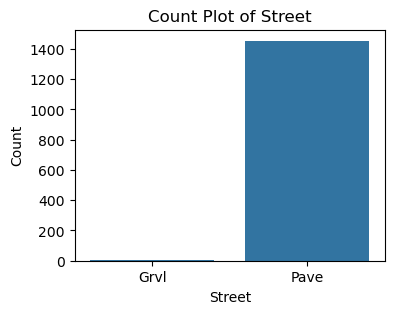

Plot for Street saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_Street.png


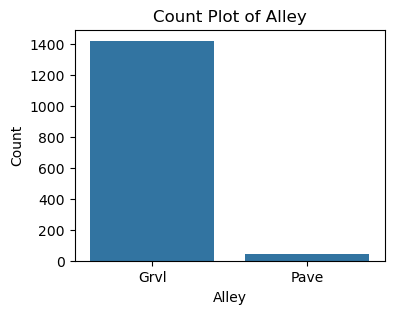

Plot for Alley saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_Alley.png


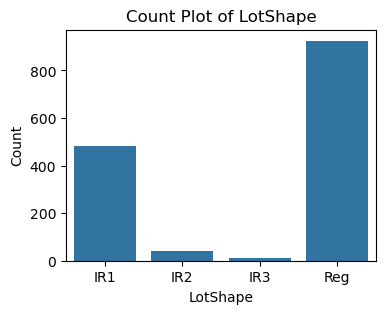

Plot for LotShape saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_LotShape.png


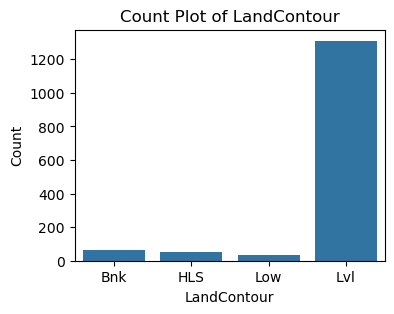

Plot for LandContour saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_LandContour.png


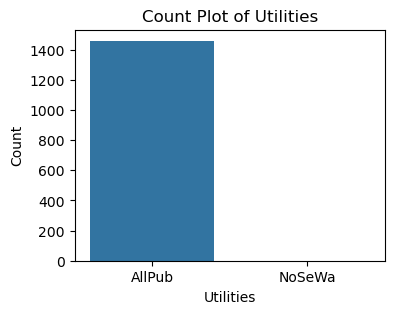

Plot for Utilities saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_Utilities.png


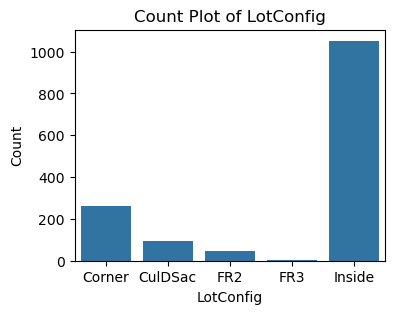

Plot for LotConfig saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_LotConfig.png


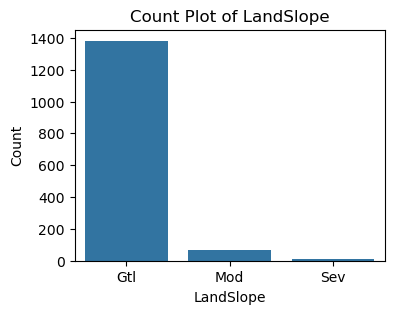

Plot for LandSlope saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_LandSlope.png


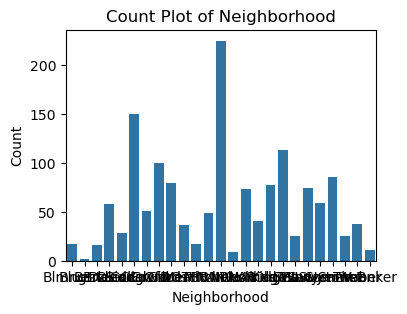

Plot for Neighborhood saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_Neighborhood.png


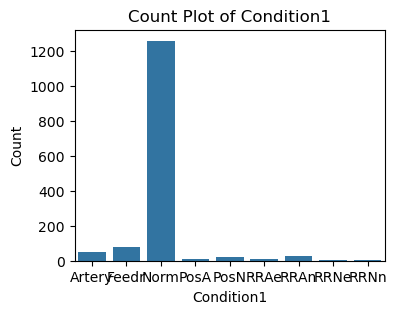

Plot for Condition1 saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_Condition1.png


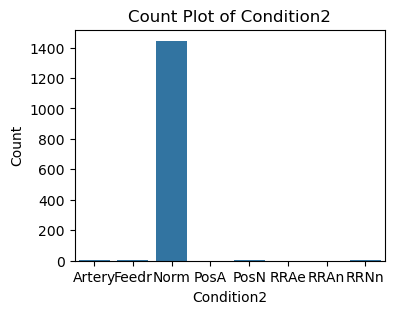

Plot for Condition2 saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_Condition2.png


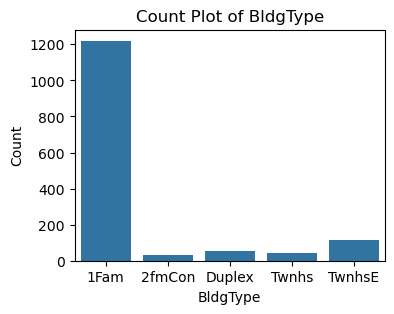

Plot for BldgType saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_BldgType.png


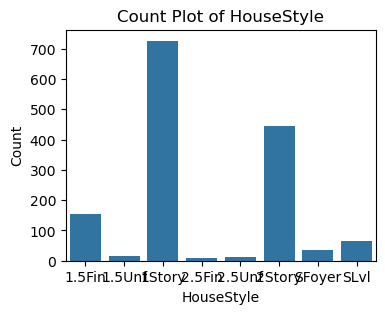

Plot for HouseStyle saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_HouseStyle.png


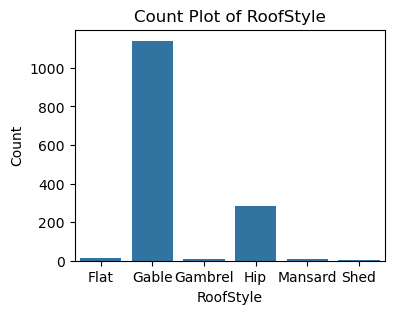

Plot for RoofStyle saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_RoofStyle.png


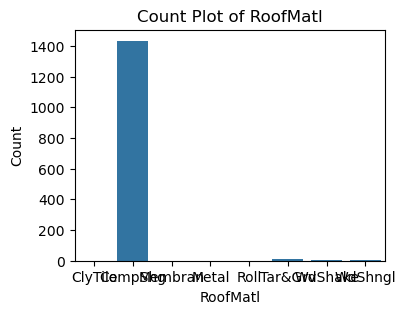

Plot for RoofMatl saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_RoofMatl.png


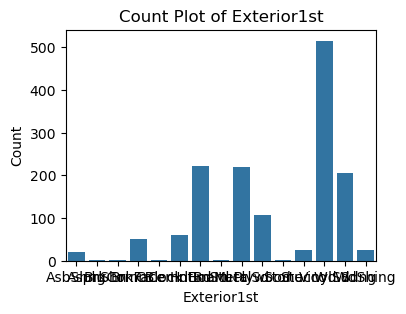

Plot for Exterior1st saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_Exterior1st.png


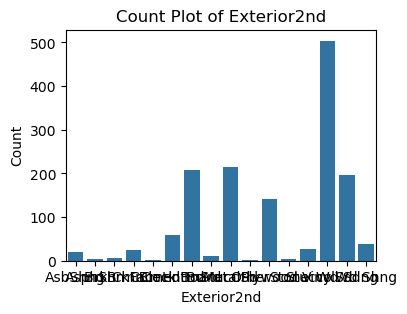

Plot for Exterior2nd saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_Exterior2nd.png


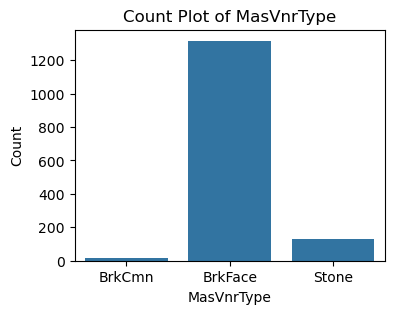

Plot for MasVnrType saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_MasVnrType.png


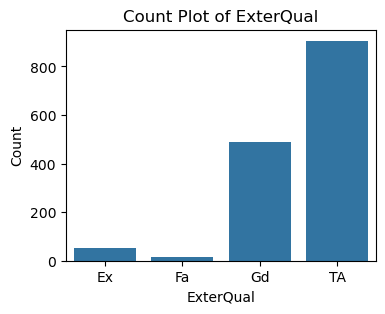

Plot for ExterQual saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_ExterQual.png


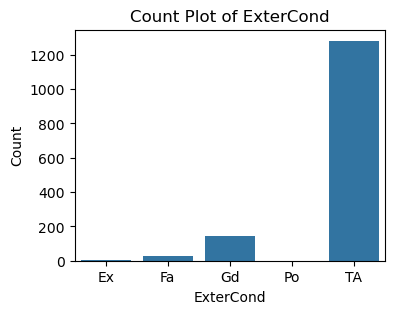

Plot for ExterCond saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_ExterCond.png


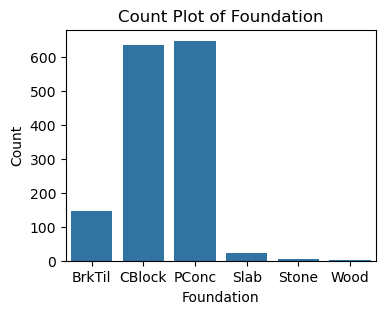

Plot for Foundation saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_Foundation.png


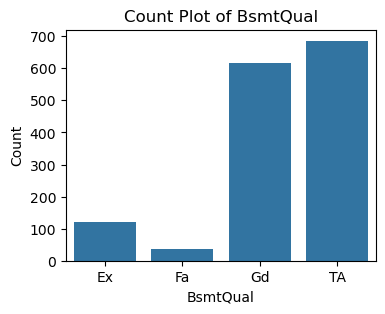

Plot for BsmtQual saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_BsmtQual.png


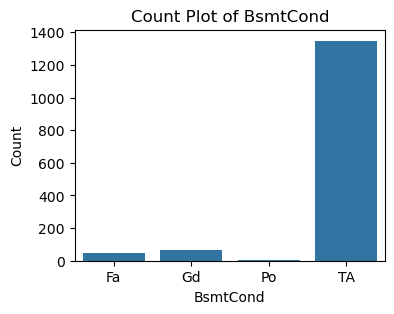

Plot for BsmtCond saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_BsmtCond.png


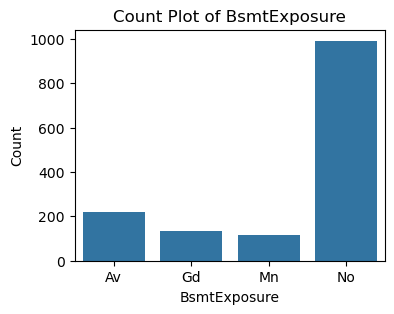

Plot for BsmtExposure saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_BsmtExposure.png


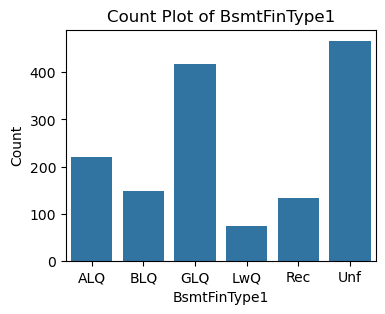

Plot for BsmtFinType1 saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_BsmtFinType1.png


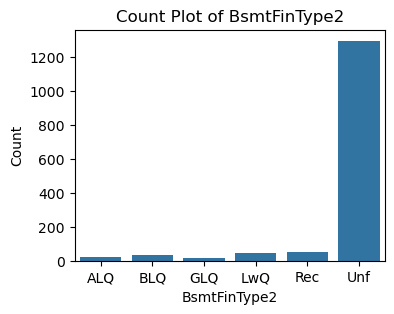

Plot for BsmtFinType2 saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_BsmtFinType2.png


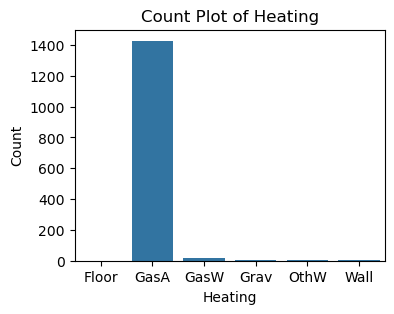

Plot for Heating saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_Heating.png


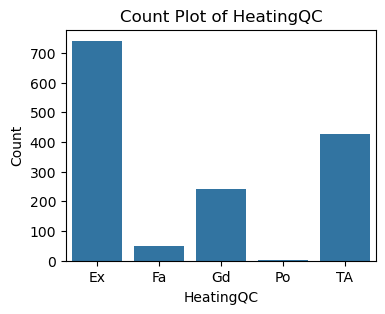

Plot for HeatingQC saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_HeatingQC.png


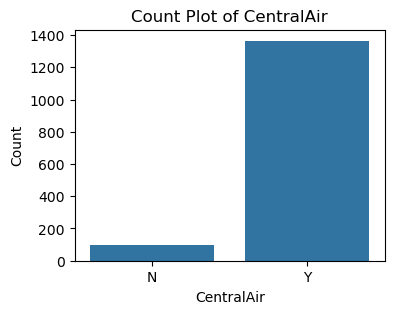

Plot for CentralAir saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_CentralAir.png


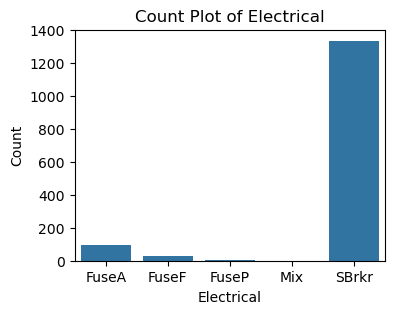

Plot for Electrical saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_Electrical.png


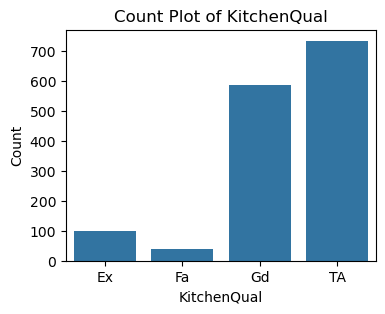

Plot for KitchenQual saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_KitchenQual.png


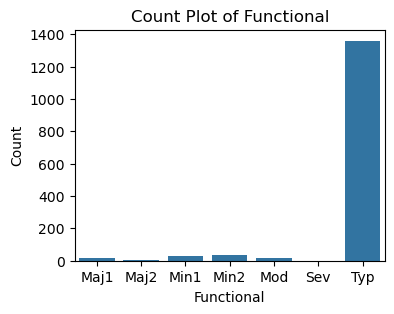

Plot for Functional saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_Functional.png


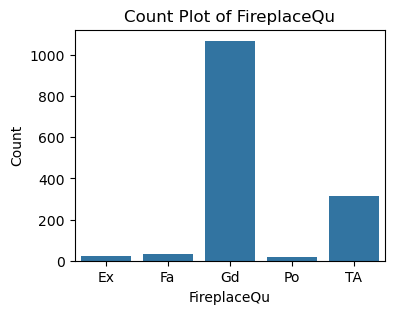

Plot for FireplaceQu saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_FireplaceQu.png


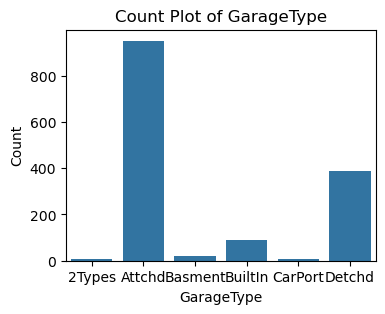

Plot for GarageType saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_GarageType.png


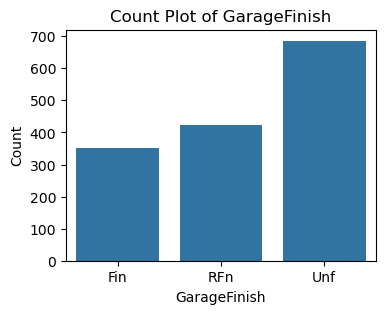

Plot for GarageFinish saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_GarageFinish.png


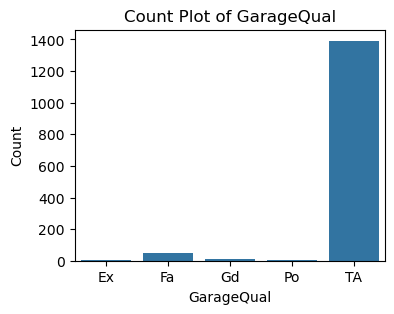

Plot for GarageQual saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_GarageQual.png


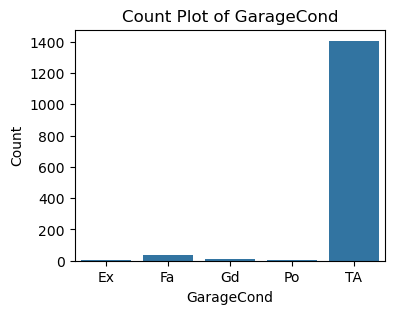

Plot for GarageCond saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_GarageCond.png


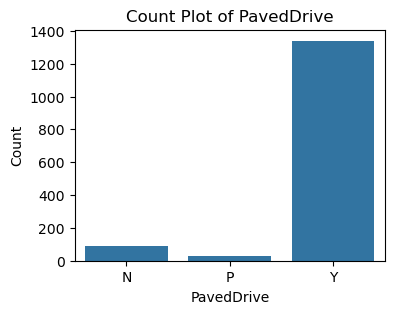

Plot for PavedDrive saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_PavedDrive.png


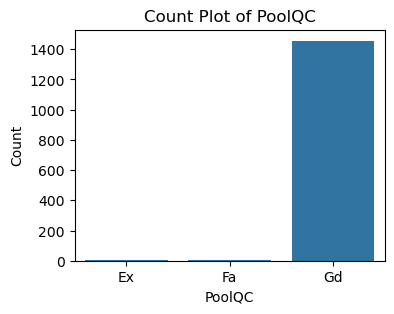

Plot for PoolQC saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_PoolQC.png


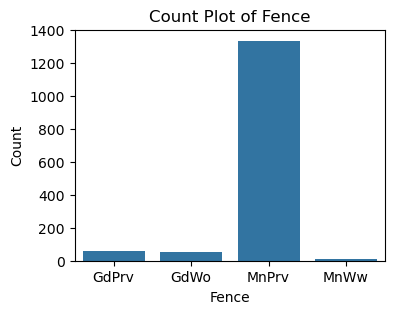

Plot for Fence saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_Fence.png


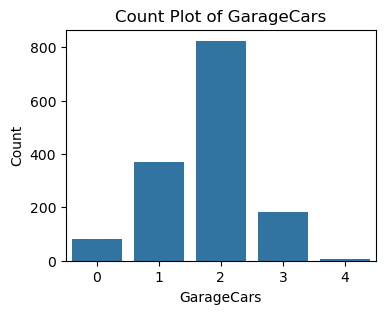

Plot for GarageCars saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_GarageCars.png


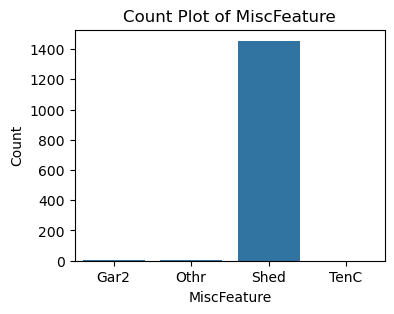

Plot for MiscFeature saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_MiscFeature.png


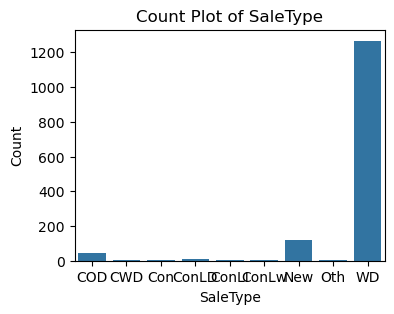

Plot for SaleType saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_SaleType.png


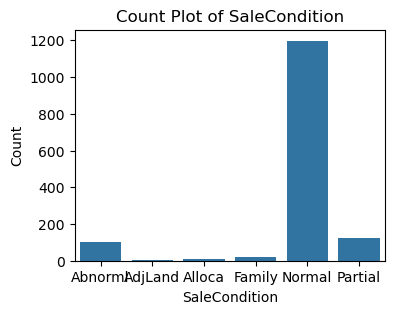

Plot for SaleCondition saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_SaleCondition.png


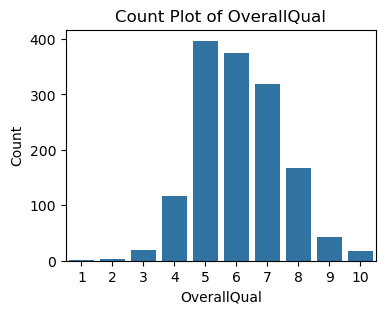

Plot for OverallQual saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_OverallQual.png


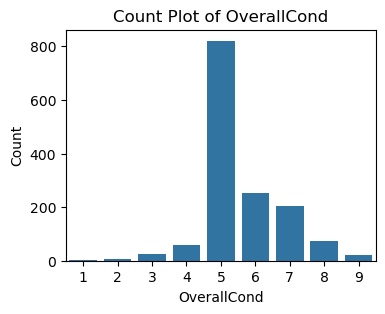

Plot for OverallCond saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_OverallCond.png


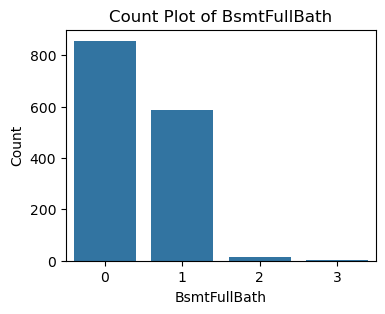

Plot for BsmtFullBath saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_BsmtFullBath.png


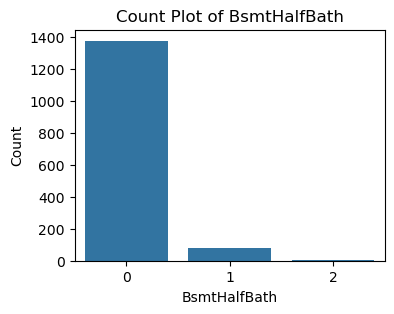

Plot for BsmtHalfBath saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_BsmtHalfBath.png


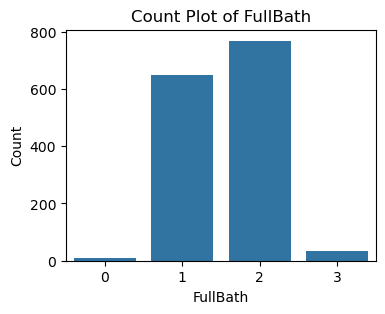

Plot for FullBath saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_FullBath.png


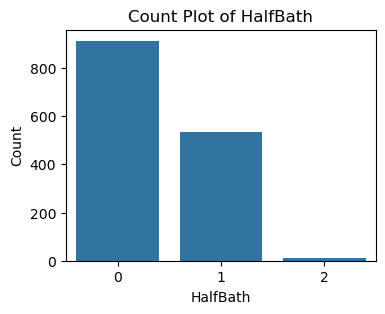

Plot for HalfBath saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_HalfBath.png


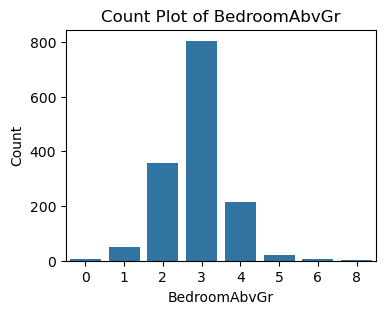

Plot for BedroomAbvGr saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_BedroomAbvGr.png


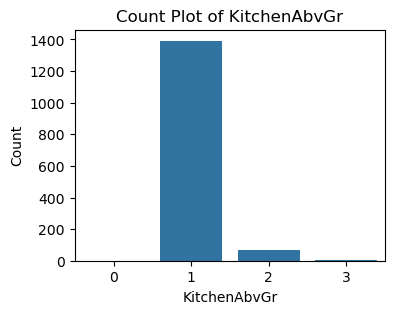

Plot for KitchenAbvGr saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_KitchenAbvGr.png


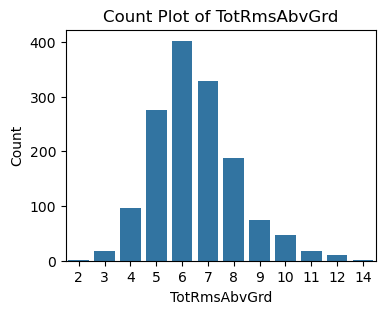

Plot for TotRmsAbvGrd saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_TotRmsAbvGrd.png


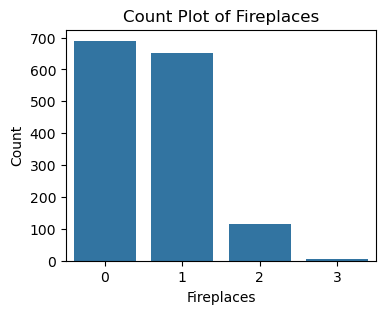

Plot for Fireplaces saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\bar_chart_Fireplaces.png


In [28]:
# Univariate Analysis:
# Plotting bar charts for each categorical variables:
# Directory where we want to save the plots
save_dir = 'C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots' 
# Identifying categorical variables
categorical_variables = [ 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
    'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
    'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
    'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
    'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'GarageCars',
    'MiscFeature', 'SaleType', 'SaleCondition','OverallQual', 'OverallCond','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
    'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces']
# Looping through each categorical variable and create a bar plot
for var in categorical_variables:
    plt.figure(figsize=(4, 3))
    sns.countplot(x=var, data=df_train)
    plt.title(f'Count Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
# Save each plot to the specified directory with a unique name
    plot_path = os.path.join(save_dir, f'bar_chart_{var}.png')
    plt.savefig(plot_path)
    plt.show()
    plt.close()  
    print(f'Plot for {var} saved to {plot_path}')

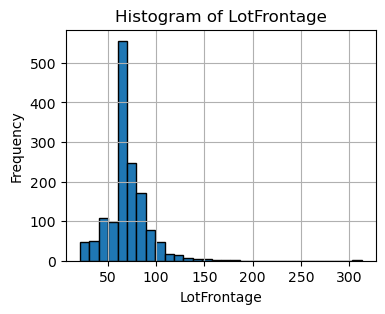

Plot for LotFrontage saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\histogram_LotFrontage.png


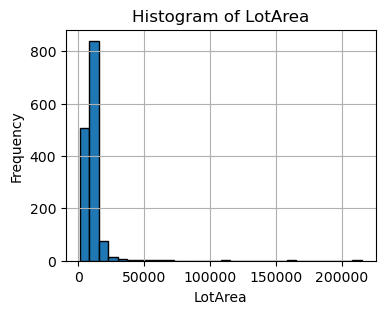

Plot for LotArea saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\histogram_LotArea.png


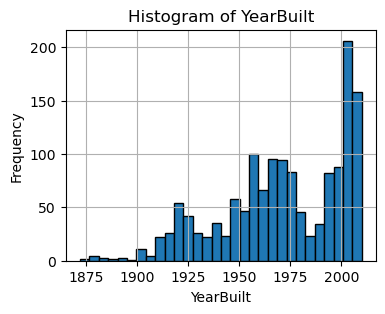

Plot for YearBuilt saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\histogram_YearBuilt.png


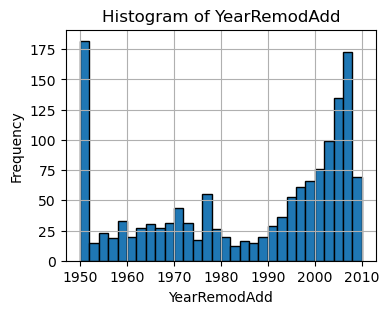

Plot for YearRemodAdd saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\histogram_YearRemodAdd.png


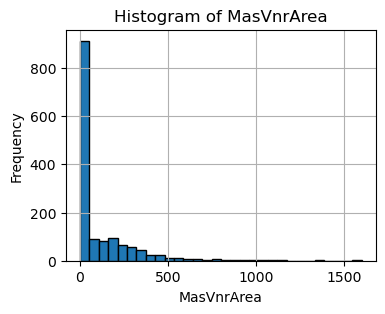

Plot for MasVnrArea saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\histogram_MasVnrArea.png


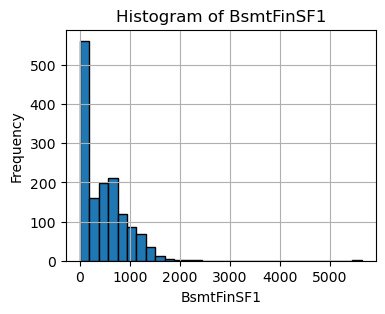

Plot for BsmtFinSF1 saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\histogram_BsmtFinSF1.png


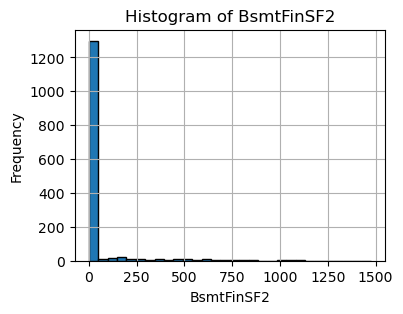

Plot for BsmtFinSF2 saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\histogram_BsmtFinSF2.png


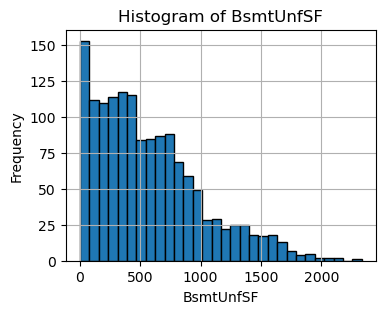

Plot for BsmtUnfSF saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\histogram_BsmtUnfSF.png


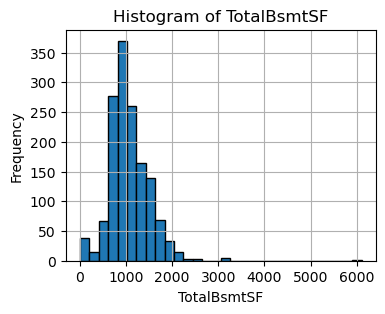

Plot for TotalBsmtSF saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\histogram_TotalBsmtSF.png


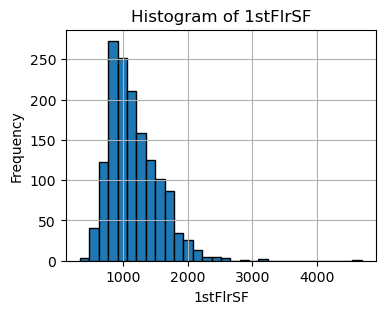

Plot for 1stFlrSF saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\histogram_1stFlrSF.png


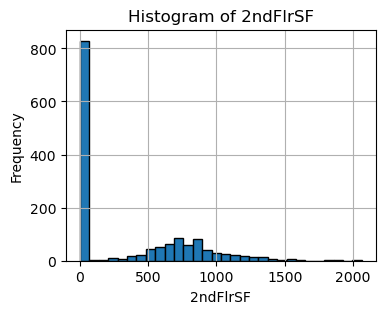

Plot for 2ndFlrSF saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\histogram_2ndFlrSF.png


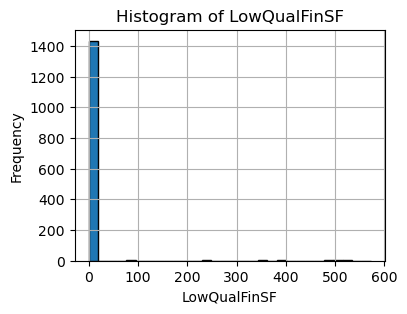

Plot for LowQualFinSF saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\histogram_LowQualFinSF.png


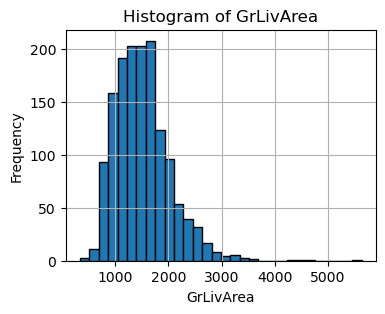

Plot for GrLivArea saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\histogram_GrLivArea.png


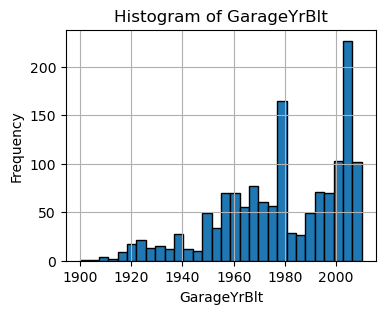

Plot for GarageYrBlt saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\histogram_GarageYrBlt.png


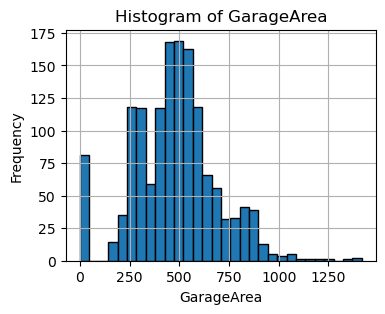

Plot for GarageArea saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\histogram_GarageArea.png


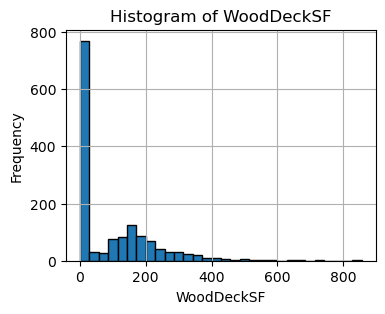

Plot for WoodDeckSF saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\histogram_WoodDeckSF.png


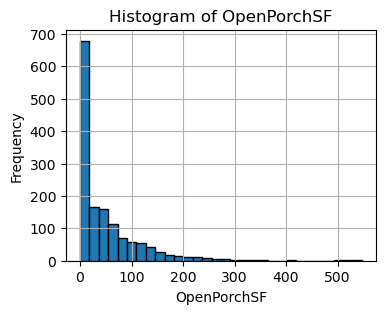

Plot for OpenPorchSF saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\histogram_OpenPorchSF.png


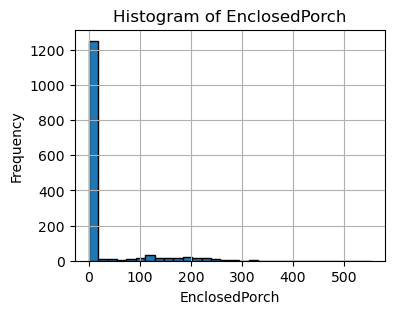

Plot for EnclosedPorch saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\histogram_EnclosedPorch.png


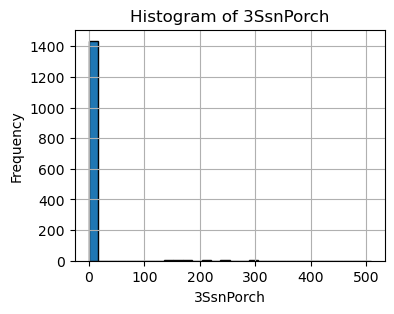

Plot for 3SsnPorch saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\histogram_3SsnPorch.png


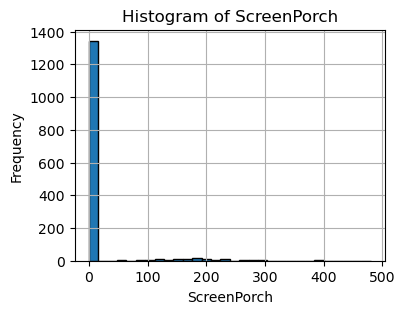

Plot for ScreenPorch saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\histogram_ScreenPorch.png


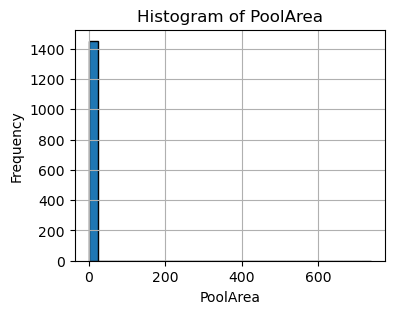

Plot for PoolArea saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\histogram_PoolArea.png


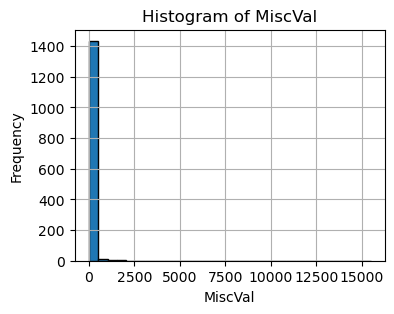

Plot for MiscVal saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\histogram_MiscVal.png


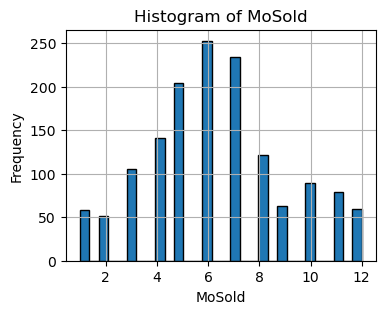

Plot for MoSold saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\histogram_MoSold.png


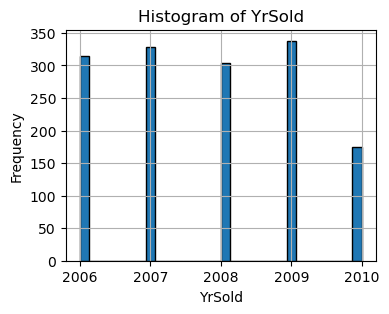

Plot for YrSold saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\histogram_YrSold.png


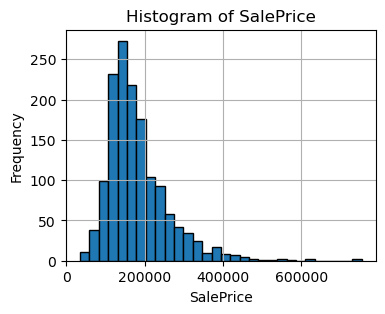

Plot for SalePrice saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\histogram_SalePrice.png


In [25]:
# Plotting histograms for each numerical variables:
# List of numerical columns
numerical_columns = [
    'LotFrontage', 'LotArea', 'YearBuilt',
    'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
    'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'
]

# Plot histograms for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(4, 3))
    plt.hist(df_train[column], bins=30, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plot_path = os.path.join(save_dir, f'histogram_{column}.png')
    plt.savefig(plot_path)
    plt.show()
    plt.close()
    print(f'Plot for {column} saved to {plot_path}')

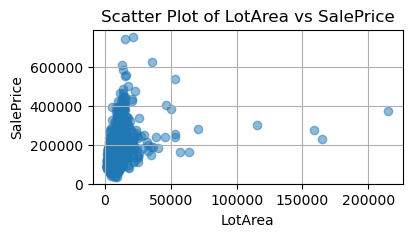

Plot for LotArea vs SalePrice saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\scatter_plot_LotArea_vs_SalePrice.png


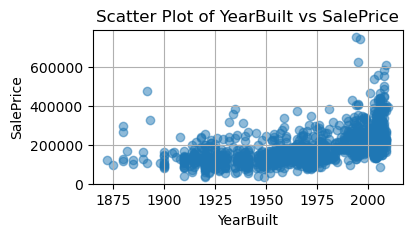

Plot for YearBuilt vs SalePrice saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\scatter_plot_YearBuilt_vs_SalePrice.png


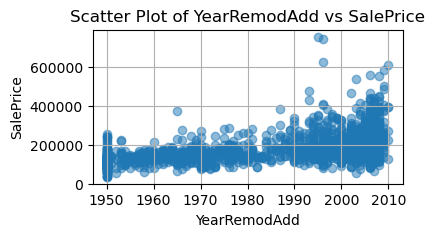

Plot for YearRemodAdd vs SalePrice saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\scatter_plot_YearRemodAdd_vs_SalePrice.png


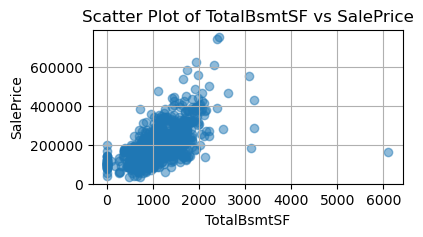

Plot for TotalBsmtSF vs SalePrice saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\scatter_plot_TotalBsmtSF_vs_SalePrice.png


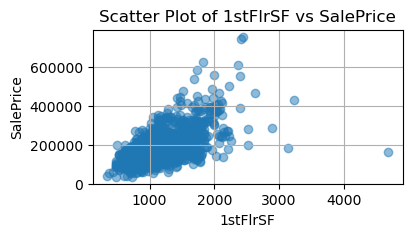

Plot for 1stFlrSF vs SalePrice saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\scatter_plot_1stFlrSF_vs_SalePrice.png


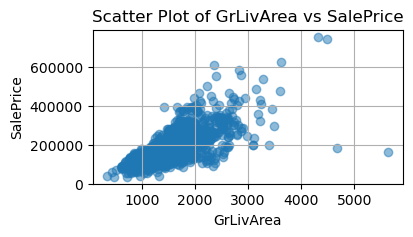

Plot for GrLivArea vs SalePrice saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\scatter_plot_GrLivArea_vs_SalePrice.png


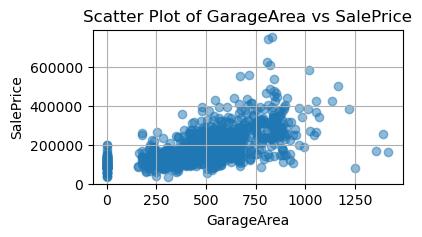

Plot for GarageArea vs SalePrice saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\scatter_plot_GarageArea_vs_SalePrice.png


In [33]:
# Bivariate Analysis:
# Listing of useful pairs of numerical columns
useful_pairs = [
    ('LotArea', 'SalePrice'), ('YearBuilt', 'SalePrice'),
    ('YearRemodAdd', 'SalePrice'), ('TotalBsmtSF', 'SalePrice'),
    ('1stFlrSF', 'SalePrice'), ('GrLivArea', 'SalePrice'),
    ('GarageArea', 'SalePrice')
]

# Plot scatter plots for each pair of numerical variables
for x, y in useful_pairs:
    plt.figure(figsize=(4, 2))
    plt.scatter(df_train[x], df_train[y], alpha=0.5)
    plt.title(f'Scatter Plot of {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plot_path = os.path.join(save_dir, f'scatter_plot_{x}_vs_{y}.png')
    plt.savefig(plot_path)
    plt.show()
    plt.close()
    print(f'Plot for {x} vs {y} saved to {plot_path}')

<Figure size 600x400 with 0 Axes>

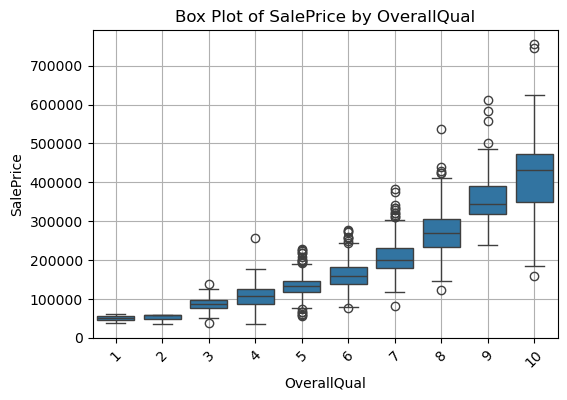

Plot for SalePrice by OverallQual saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\box_plot_SalePrice_by_OverallQual.png


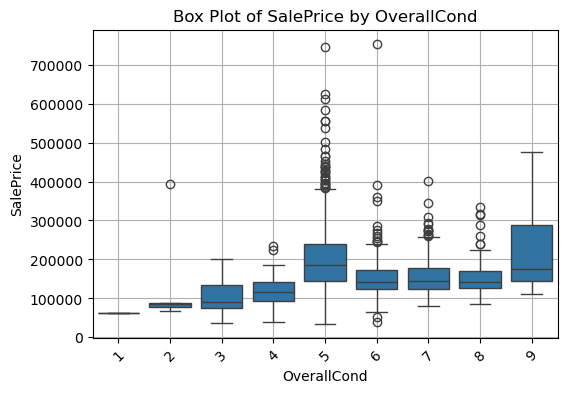

Plot for SalePrice by OverallCond saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\box_plot_SalePrice_by_OverallCond.png


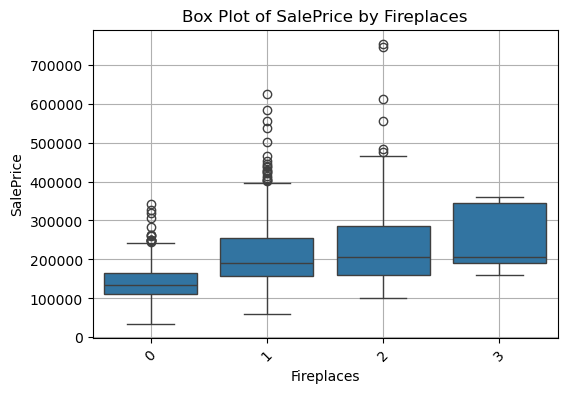

Plot for SalePrice by Fireplaces saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\box_plot_SalePrice_by_Fireplaces.png


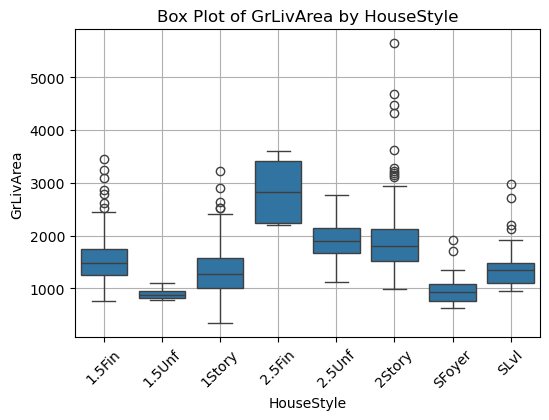

Plot for GrLivArea by HouseStyle saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\box_plot_GrLivArea_by_HouseStyle.png


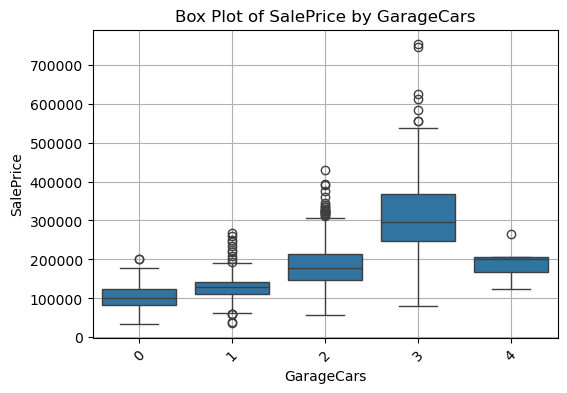

Plot for SalePrice by GarageCars saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\box_plot_SalePrice_by_GarageCars.png


In [35]:
# List of useful pairs of numerical and categorical columns
useful_pairs_variables = [
    ('SalePrice', 'OverallQual'), ('SalePrice', 'OverallCond'),
    ('SalePrice', 'Fireplaces'), ('GrLivArea', 'HouseStyle'),
    ('SalePrice', 'GarageCars')
]

# Plot box plots for each pair of numerical and categorical variables
for num_col, cat_col in useful_pairs_variables:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_train[cat_col], y=df_train[num_col])
    plt.title(f'Box Plot of {num_col} by {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel(num_col)
    plt.xticks(rotation=45)
    plt.grid(True)
    plot_path = os.path.join(save_dir, f'box_plot_{num_col}_by_{cat_col}.png')
    plt.savefig(plot_path)
    plt.show()
    plt.close()
    print(f'Plot for {num_col} by {cat_col} saved to {plot_path}')

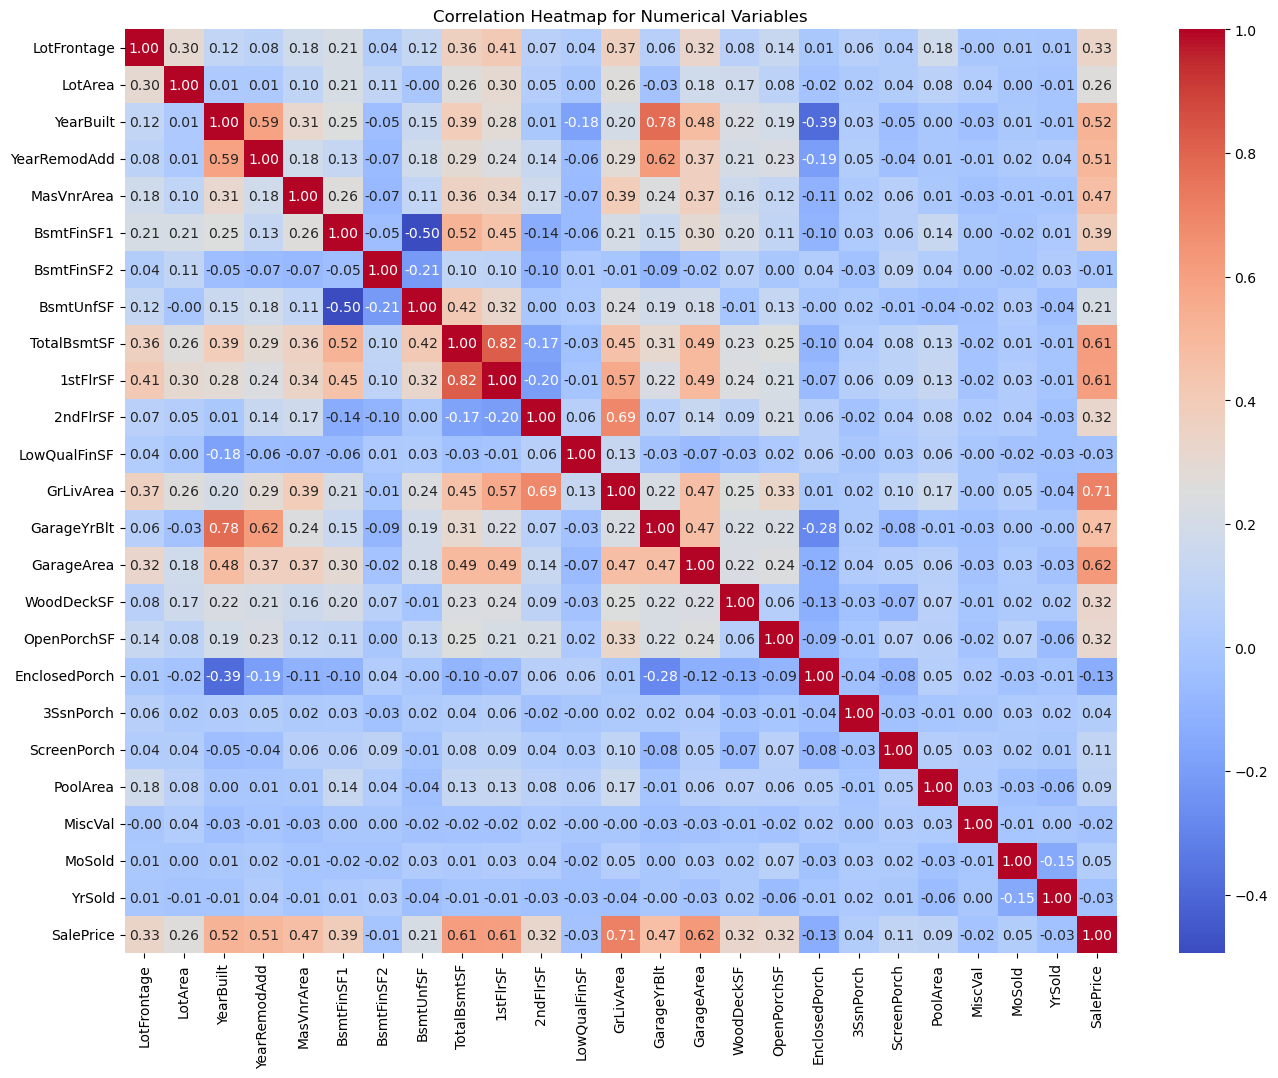

Heatmap saved to C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/Assignment_3_Part_3_folder/Results/Plots\correlation_heatmap_numerical_variables.png


In [22]:
#correlation Heatmap:
# Calculating correlation matrix for numerical variables
corr_matrix = df_train[numerical_columns].corr()
corr_matrix

# Plotting heatmap for numerical correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numerical Variables')
plot_path = os.path.join(save_dir, 'correlation_heatmap_numerical_variables.png')
plt.savefig(plot_path)
plt.show()
plt.close()
print(f'Heatmap saved to {plot_path}')